In [4]:
import pandas as pd

# 读取 Bank_customers.csv 文件
df = pd.read_csv('Bank_customers.csv')

In [5]:
df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,unknown,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [6]:
df.tail()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
22495,22496,33,admin.,married,high.school,no,no,no,cellular,aug,...,3,925,3,failure,-2.9,92.47,-43.30,3.36,5203.22,yes
22496,22497,34,admin.,divorced,high.school,no,unknown,unknown,cellular,aug,...,14,533,3,failure,1.4,93.64,-26.27,4.41,4914.80,no
22497,22498,25,admin.,married,professional.course,no,yes,no,cellular,may,...,0,792,5,success,-1.8,90.43,-36.75,4.05,5114.30,no
22498,22499,57,retired,married,high.school,no,yes,no,telephone,may,...,5,989,0,nonexistent,1.1,89.38,-37.96,4.95,5284.43,no
22499,22500,44,blue-collar,married,basic.9y,unknown,yes,no,cellular,apr,...,0,1001,1,failure,-1.8,90.18,-46.20,1.45,5155.19,yes


In [7]:
# 检测缺失值
missing_values = df.isnull().sum()

# 输出各字段的缺失值数量，其中Age、Cabin、Embarked存在缺失值
missing_values

id                  0
age                 0
job                 0
marital             0
education           0
default             0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_index    0
cons_conf_index     0
lending_rate3m      0
nr_employed         0
subscribe           0
dtype: int64

In [ ]:
# 该份数据不存在缺失值

In [8]:
# 检测重复值
duplicate_rows = df.duplicated()
duplicate_rows_count = duplicate_rows.sum()
print("重复行数:", duplicate_rows_count)

重复行数: 0


In [9]:
# 该份数据不存在重复行

In [10]:
# 基本统计分析(包含数量、均值、方差、最小值、最大值等)
statistics = df.describe()
print(statistics)

                 id           age      duration      campaign         pdays  \
count  22500.000000  22500.000000  22500.000000  22500.000000  22500.000000   
mean   11250.500000     40.407511   1146.303733      3.364800    773.991956   
std     6495.334864     12.086078   1432.432125      7.223837    326.934334   
min        1.000000     16.000000      0.000000      0.000000      0.000000   
25%     5625.750000     32.000000    143.000000      1.000000    557.750000   
50%    11250.500000     38.000000    353.000000      1.000000    964.000000   
75%    16875.250000     47.000000   1873.000000      3.000000   1005.000000   
max    22500.000000    101.000000   5149.000000     57.000000   1048.000000   

           previous  emp_var_rate  cons_price_index  cons_conf_index  \
count  22500.000000  22500.000000      22500.000000     22500.000000   
mean       1.316444      0.078529         93.548785       -39.877180   
std        1.918733      1.573831          2.805786         5.805442   


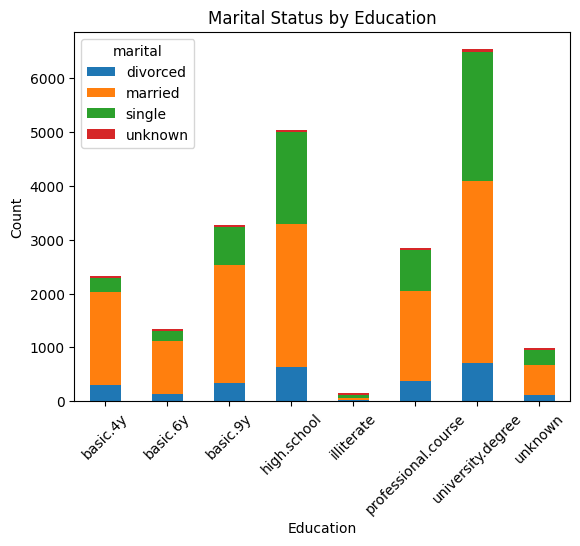

In [14]:
import matplotlib.pyplot as plt

# 按教育程度和婚姻状况进行分组，并计算每个组的数量
grouped_data = df.groupby(['education', 'marital']).size().unstack()

# 绘制柱状图
grouped_data.plot(kind='bar', stacked=True)

# 设置图形属性
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Marital Status by Education')
plt.xticks(rotation=45)

# 显示图形
plt.show()

In [15]:
grouped_data

marital,divorced,married,single,unknown
education,,,,
basic.4y,304,1724,255,39
basic.6y,145,971,196,37
basic.9y,337,2185,706,38
high.school,641,2641,1705,44
illiterate,29,42,45,45
professional.course,375,1669,772,37
university.degree,714,3379,2385,46
unknown,113,567,280,34


In [16]:
# 【分析一】统计高中学历婚姻状况的比例

In [19]:
# 筛选出高中学历的数据
high_school_data = df[df['education'] == 'high.school']

# 统计高中学历下不同婚姻状况的数量
grouped_data = high_school_data.groupby('marital').size().reset_index(name='count')

# 计算比例
total_count = grouped_data['count'].sum()
grouped_data['ratio'] = grouped_data['count'] / total_count

# 输出统计结果
print(grouped_data[['marital', 'ratio']])

    marital     ratio
0  divorced  0.127410
1   married  0.524945
2    single  0.338899
3   unknown  0.008746


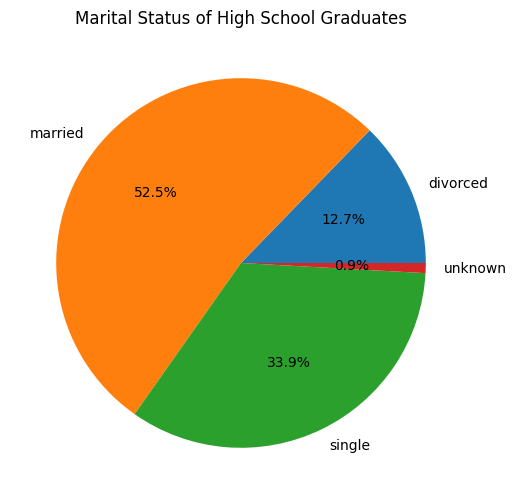

In [20]:
# 【分析一的可视化】使用饼图表示高中学历婚姻状况的比例
plt.figure(figsize=(6, 6))
labels = grouped_data['marital']
sizes = grouped_data['count']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Marital Status of High School Graduates')
plt.show()

In [ ]:
# 【分析一的结论】高中学历中结婚的比例达到了52.5%

In [21]:
# 【分析二】统计每个职业的分布情况

In [33]:
# 统计每个职业的人数
job_counts = df['job'].value_counts()

# 根据人数进行排序
job_counts = job_counts.sort_values()

job_counts

job
unknown           274
student           573
unemployed        647
housemaid         657
self-employed     836
entrepreneur      863
retired          1006
management       1600
services         2083
technician       3530
blue-collar      4874
admin.           5557
Name: count, dtype: int64

In [38]:
# 人数最多的职业占比
print(f'{round(max(job_counts) / df["job"].count() * 100,2)}%')

24.7%


In [ ]:
# 【分析二的结论】该份数据中职业为管理人员(admin.)的人数最多，达到了5557，占比 24.7%

In [39]:
# 【分析二的可视化】使用统计图表示各个职业的人数分布情况

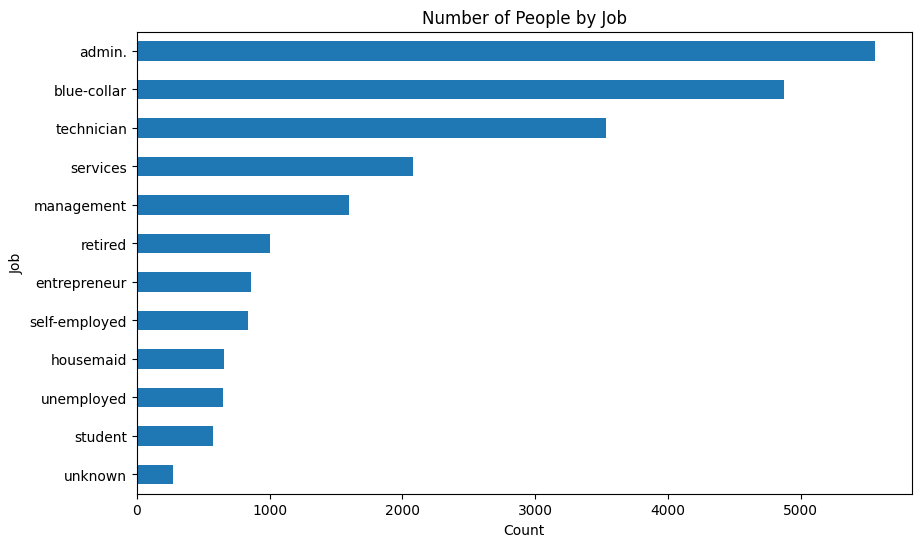

In [40]:
plt.figure(figsize=(10, 6))
job_counts.plot(kind='barh')
plt.title('Number of People by Job')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

In [41]:
# 【分析三】统计20-30岁之间用户订阅该产品的比例分布

In [45]:
# 筛选年龄在 20-30 岁之间的数据
age_filter = (df['age'] >= 20) & (df['age'] <= 30)
subset_df = df[age_filter]

# 计算各个年龄的订阅比例
age_counts = subset_df['age'].value_counts()
age_proportions = (age_counts / age_counts.sum()) * 100

age_proportions

age
30    21.876399
29    18.696820
28    13.949843
27    11.867443
26     9.740260
25     7.120466
24     6.829378
23     4.343932
22     2.642185
21     1.724138
20     1.209136
Name: count, dtype: float64

In [ ]:
# 【分析三的可视化】使用饼图绘制20-30岁之间用户订阅该产品的比例分布

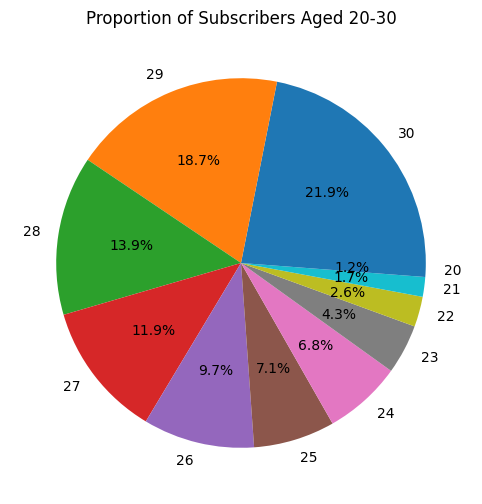

In [46]:
plt.figure(figsize=(8, 6))
plt.pie(age_proportions, labels=age_proportions.index, autopct='%1.1f%%')
plt.title('Proportion of Subscribers Aged 20-30')
plt.show()

In [47]:
# 【分析三的可视化】使用柱状图绘制20-30岁之间用户订阅该产品的比例分布

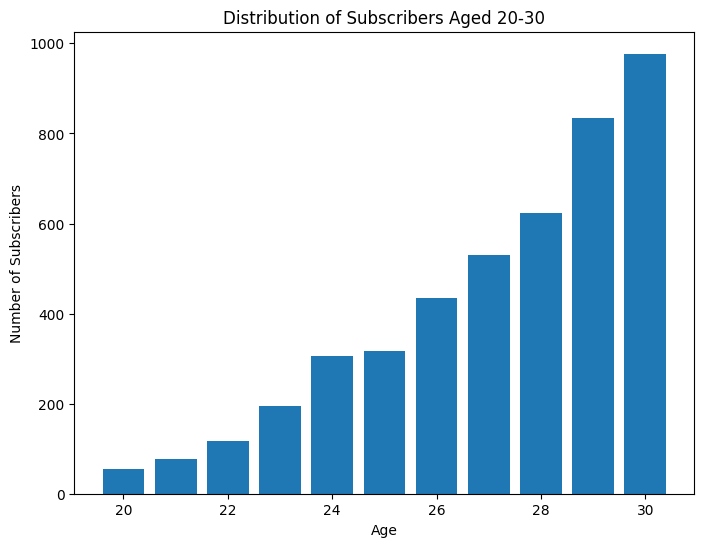

In [48]:
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of Subscribers')
plt.title('Distribution of Subscribers Aged 20-30')
plt.show()

In [49]:
# 【分析四】统计拥有房屋贷款、个人贷款、房屋贷款&个人贷款的人数，并计算其占比总人数

In [65]:
# 计算同时拥有房屋贷款和个人贷款的人数
housing_count = len(df[(df['housing'] == 'yes')])
loan_count = len(df[(df['loan'] == 'yes')])
both_loans_count = len(df[(df['housing'] == 'yes') & (df['loan'] == 'yes')])

# 计算占比总人数
total_count = len(df)
housing_loans_ratio = round(housing_count / total_count * 100, 2) 
loans_ratio = round(loan_count / total_count * 100, 2) 
both_loans_ratio = round(both_loans_count / total_count * 100, 2) 

# 输出结果
print(f"拥有房屋贷款的人数: {housing_count}")
print(f"拥有个人贷款的人数: {loan_count}")
print(f"同时拥有房屋贷款和个人贷款的人数: {both_loans_count}")
print(f"总人数: {total_count}")
print(f"拥有房屋贷款的人数占比总人数: {housing_loans_ratio}%")
print(f"拥有个人贷款的人数占比总人数: {loans_ratio}%")
print(f"同时拥有房屋贷款和个人贷款的人数占比总人数: {both_loans_ratio}%")

拥有房屋贷款的人数: 11568
拥有个人贷款的人数: 3657
同时拥有房屋贷款和个人贷款的人数: 2055
总人数: 22500
拥有房屋贷款的人数占比总人数: 51.41%
拥有个人贷款的人数占比总人数: 16.25%
同时拥有房屋贷款和个人贷款的人数占比总人数: 9.13%


In [ ]:
# 【分析四的可视化】使用柱状图统计拥有房屋贷款、个人贷款、房屋贷款&个人贷款的人数，并计算其占比总人数

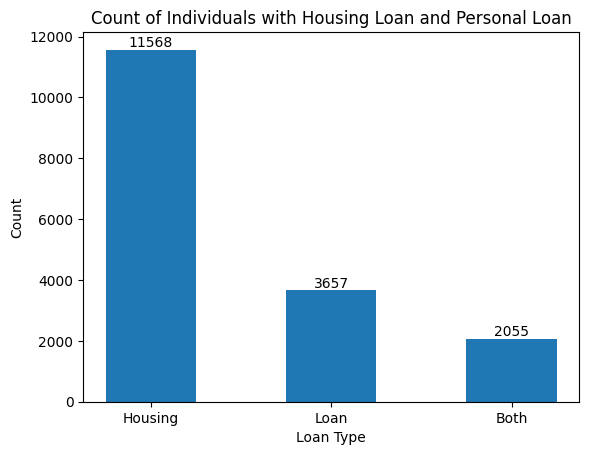

In [63]:
# 创建柱状图数据
labels = ['Housing', 'Loan', 'Both']
counts = [housing_count, loan_count, both_loans_count]

# 设置柱状图参数
x = range(len(labels))
width = 0.5

# 绘制柱状图
plt.bar(x, counts, width, align='center')
plt.xticks(x, labels)
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Count of Individuals with Housing Loan and Personal Loan')

# 添加数据标签
for i, count in enumerate(counts):
    plt.text(x[i], count, str(count), ha='center', va='bottom')

# 显示图形
plt.show()

In [66]:
# 【分析四的结论】
# 拥有房屋贷款的人数: 11568
# 拥有个人贷款的人数: 3657
# 同时拥有房屋贷款和个人贷款的人数: 2055
# 总人数: 22500
# 拥有房屋贷款的人数占比总人数: 51.41%
# 拥有个人贷款的人数占比总人数: 16.25%
# 同时拥有房屋贷款和个人贷款的人数占比总人数: 9.13%